In [1]:
# useful additional packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

In [2]:
# The IBM Qiskit Runtime
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator)
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options

# Saves login credentials to disk, if using new credentials
QiskitRuntimeService.save_account(
    channel="ibm_quantum", token="60a6f674d4c3af8baad5ad33a982e531af05323b4664c4bf90ef0d6d346bac77b0317ebd2e261f7e4d4e903d5983d3435a32c3e634d0085b89d77cd42209bcfa",
    instance="ibm-q-research-2/marist-ibm-1/main", overwrite=True)

service = QiskitRuntimeService()

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime

# Setting a variable to the current time using now()
current_time = datetime.datetime.now()

# Generating a graph of n nodes
n = 7  # Number of nodes in graph


G = nx.Graph()  # Graph G is the Brute Force Graph
G2 = nx.Graph()  # Graph G2 is the VQE Solution Graph
G3 = nx.Graph()  # Graph G3 is the EigenOptimizer Check Solution Graph


G.add_nodes_from(np.arange(0, n, 1))
G2.add_nodes_from(np.arange(0, n, 1))
G3.add_nodes_from(np.arange(0, n, 1))


# List is formatted as the following
#   (x, y, z)
#   x = # of the node (it's identifier)
#   y = The node that x is connected to
#   z = Weight of the line between x and y

elist = [

    (0, 1, 1),
    (0, 2, 5),
    (0, 3, 5),
    (0, 4, 5),
    (0, 5, 1),
    (0, 6, 1),

    (1, 0, 1),
    (1, 2, 5),
    (1, 3, 5),
    (1, 4, 5),
    (1, 5, 1),
    (1, 6, 1),

    (2, 0, 5),
    (2, 1, 5),

    (3, 0, 5),
    (3, 1, 5),

    (4, 0, 5),
    (4, 1, 5),

    (5, 0, 1),
    (5, 1, 1),
    (5, 6, 1),

    (6, 0, 1),
    (6, 1, 1),
    (6, 5, 1)

]

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)
G2.add_weighted_edges_from(elist)
G3.add_weighted_edges_from(elist)


colors = ['r' for node in G.nodes()]
colors2 = ['r' for node in G2.nodes()]
colors3 = ['r' for node in G3.nodes()]

pos = nx.spring_layout(G)
pos2 = nx.spring_layout(G2)
pos3 = nx.spring_layout(G3)

style2 = ['solid' for edge in G2.edges()]
style3 = ['solid' for edge in G3.edges()]

def draw_graph(G, colors, pos, style):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "BruteForce MaxCut Solution"

    # Label variable for X-axis
    xax = ""

    # Label variable for Y-axis
    yax = ""

    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)

    # Main drawing call of the graph
    style = nx.get_edge_attributes(G, 'style')
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx(G, node_color=colors, node_size=600,
                     alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

    # edge_color : color or array of colors (default='k')
    # Find a way to make cut lines into dotted lines

    # Create 2 edgelists. 1 with the non-cut edges, and another with only the cut edges

    # cut_edges = [(u, v) for u, v in G.edges if lut[u] != lut[v]]
    # uncut_edges = [(u, v) for u, v in G.edges if lut[u] == lut[v]]

    # nx.draw_networkx_edges(G, pos, edgelist=cut_edges,
    #                       style='dashdot', alpha=0.5, width=3)
    # nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)


def draw_graph2(G2, colors2, pos2, style2):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "SamplingVQE Solution"

    # Label variable for X-axis
    xax = ""

    # Label variable for Y-axis
    yax = ""

    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)

    # Main drawing call of the graph
    style2 = nx.get_edge_attributes(G2, 'style')
    nx.draw_networkx_edges(G2, pos=pos2, style=style2)
    nx.draw_networkx(G2, node_color=colors2, node_size=600,
                     alpha=.8, ax=default_axes, pos=pos2)
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos=pos2, edge_labels=edge_labels)


def draw_graph3(G3, colors3, pos3, style3):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "EO Check Solution"

    # Label variable for X-axis
    xax = ""

    # Label variable for Y-axis
    yax = ""

    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)

    # Main drawing call of the graph
    style3 = nx.get_edge_attributes(G3, 'style')
    nx.draw_networkx_edges(G3, pos=pos3, style=style3)
    nx.draw_networkx(G3, node_color=colors3, node_size=600,
                     alpha=.8, ax=default_axes, pos=pos3)
    edge_labels = nx.get_edge_attributes(G3, 'weight')
    nx.draw_networkx_edge_labels(G3, pos=pos3, edge_labels=edge_labels)



In [4]:
# Executing our draw_graph function to draw the graph
# draw_graph(G, colors, pos)


""" # Formats date for use in file saving
curTime = current_time.hour + ":" + current_time.minute + "_" + current_time.month + "/" + current_time.date + "/" + current_time.year
nx.draw(draw_graph(G, colors, pos))

# Saves graph as file in directory with timestamp
plt.savefig("BestBrute" + curTime ".png") """

# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp['weight']
print("Weight Matrix: ", w)

best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i, j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print('case = ' + str(x) + ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]
style = ['solid' if xbest_brute[i] == 0 else 'dashed' for i in range(n)]

Weight Matrix:  [[0. 1. 5. 5. 5. 1. 1.]
 [1. 0. 5. 5. 5. 1. 1.]
 [5. 5. 0. 0. 0. 0. 0.]
 [5. 5. 0. 0. 0. 0. 0.]
 [5. 5. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 1. 0.]]
case = [0, 0, 0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0, 0, 0] cost = 18.0
case = [0, 1, 0, 0, 0, 0, 0] cost = 18.0
case = [1, 1, 0, 0, 0, 0, 0] cost = 34.0
case = [0, 0, 1, 0, 0, 0, 0] cost = 10.0
case = [1, 0, 1, 0, 0, 0, 0] cost = 18.0
case = [0, 1, 1, 0, 0, 0, 0] cost = 18.0
case = [1, 1, 1, 0, 0, 0, 0] cost = 24.0
case = [0, 0, 0, 1, 0, 0, 0] cost = 10.0
case = [1, 0, 0, 1, 0, 0, 0] cost = 18.0
case = [0, 1, 0, 1, 0, 0, 0] cost = 18.0
case = [1, 1, 0, 1, 0, 0, 0] cost = 24.0
case = [0, 0, 1, 1, 0, 0, 0] cost = 20.0
case = [1, 0, 1, 1, 0, 0, 0] cost = 18.0
case = [0, 1, 1, 1, 0, 0, 0] cost = 18.0
case = [1, 1, 1, 1, 0, 0, 0] cost = 14.0
case = [0, 0, 0, 0, 1, 0, 0] cost = 10.0
case = [1, 0, 0, 0, 1, 0, 0] cost = 18.0
case = [0, 1, 0, 0, 1, 0, 0] cost = 18.0
case = [1, 1, 0, 0, 1, 0, 0] cost = 2


Best solution = [1, 1, 0, 0, 0, 0, 0] cost = 34.0
['dashed', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid']


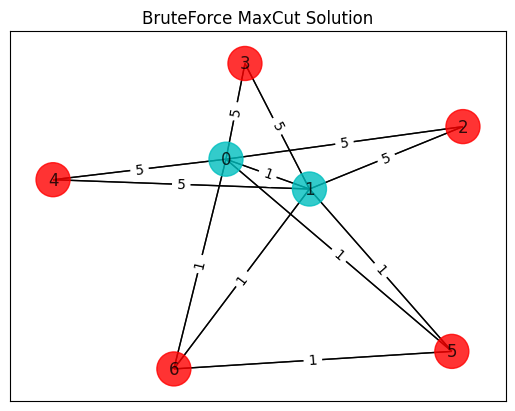

In [5]:
# Final draw of brute force graph
draw_graph(G, colors, pos, style)
print('\nBest solution = ' + str(xbest_brute) +
      ' cost = ' + str(best_cost_brute))
print(style)

In [6]:
"""
import rustworkx
from rustworkx.visualization import mpl_draw

graph = rustworkx.PyGraph.from_adjacency_matrix(w)
layout = rustworkx.random_layout(graph, seed=50)
colors = ["r", "g", "b", "y"]
mpl_draw(graph, layout, node_color=colors)
                                                """

'\nimport rustworkx\nfrom rustworkx.visualization import mpl_draw\n\ngraph = rustworkx.PyGraph.from_adjacency_matrix(w)\nlayout = rustworkx.random_layout(graph, seed=50)\ncolors = ["r", "g", "b", "y"]\nmpl_draw(graph, layout, node_color=colors)\n                                                '

In [7]:
# Desired instance goes here,
# for running jobs on the quantum machine, use "ibmq_guadalupe"
# For running jobs on a simulator, use "simulator_statevector" or "ibmq_qasm_simulator"
from qiskit_optimization.applications import Maxcut
import matplotlib.pyplot as plt
backend = "ibmq_guadalupe"

# Plotting functions
%config InlineBackend.figure_format = 'retina'

# Maxcut import


# Define our Qiskit Maxcut Instance
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()

# Translate to Ising Hamiltonian
qubitOp, offset = qp.to_ising()

print(qubitOp)


0.5 * IIIIIZZ
+ 2.5 * IIIIZIZ
+ 2.5 * IIIIZZI
+ 2.5 * IIIZIIZ
+ 2.5 * IIIZIZI
+ 2.5 * IIZIIIZ
+ 2.5 * IIZIIZI
+ 0.5 * IZIIIIZ
+ 0.5 * IZIIIZI
+ 0.5 * ZIIIIIZ
+ 0.5 * ZIIIIZI
+ 0.5 * ZZIIIII


In [8]:
from typing import List
from qiskit_optimization import QuadraticProgram
from qiskit.algorithms import QAOA
from qiskit.circuit import Parameter, ParameterVector
from qiskit import QuantumCircuit

def maxcut_cost_fn(graph: nx.Graph, bitstring: List[int]) -> float:
    """
    Computes the maxcut cost function value for a given graph and cut represented by some bitstring
    Args:
        graph: The graph to compute cut values for
        bitstring: A list of integer values '0' or '1' specifying a cut of the graph
    Returns:
        The value of the cut
    """
    # Get the weight matrix of the graph
    weight_matrix = nx.adjacency_matrix(graph).toarray()
    size = weight_matrix.shape[0]
    value = 0.
    for i in range(size):
        for j in range(size):
            value = value + weight_matrix[i][j] * \
                bitstring[i] * (1-bitstring[j])

    return value


def quadratic_program_from_graph(graph: nx.Graph) -> QuadraticProgram:
    """Constructs a quadratic program from a given graph for a MaxCut problem instance.
    Args:
        graph: Underlying graph of the problem.
    Returns:
        QuadraticProgram
    """
    # Get weight matrix of graph
    weight_matrix = nx.adjacency_matrix(graph)
    shape = weight_matrix.shape
    size = shape[0]

    # Build qubo matrix Q from weight matrix W
    qubo_matrix = np.zeros((size, size))
    qubo_vector = np.zeros(size)
    for i in range(size):
        for j in range(size):
            qubo_matrix[i, j] -= weight_matrix[i, j]
    for i in range(size):
        for j in range(size):
            qubo_vector[i] += weight_matrix[i, j]

    quadratic_program = QuadraticProgram('MaxCut as QUBO')
    for i in range(size):
        quadratic_program.binary_var(name=f'x_{i}')

    quadratic_program.maximize(quadratic=qubo_matrix, linear=qubo_vector)

    return quadratic_program


def qaoa_circuit(qubo: QuadraticProgram, p: int = 1, params: dict = []) -> QuantumCircuit:
    """
    Given a QUBO instance and the number of layers p, constructs the corresponding parameterized QAOA circuit with p layers.
    Args:
        qubo: The quadratic program instance
        p: The number of layers in the QAOA circuit
    Returns:
        The parameterized QAOA circuit
    """
    size = len(qubo.variables)
    qubo_matrix = qubo.objective.quadratic.to_array(symmetric=True)
    qubo_linearity = qubo.objective.linear.to_array()

    # Prepare the quantum and classical registers
    qaoa_circuit = QuantumCircuit(size, size)
    # Apply the initial layer of Hadamard gates to all qubits
    qaoa_circuit.h(range(size))

    # Create the parameters to be used in the circuit
    if not params:
        gammas = ParameterVector('gamma', p)
        betas = ParameterVector('beta', p)
    else:
        gammas = [params[1]]
        betas = [params[0]]

    # Outer loop to create each layer
    for i in range(p):

        # Apply R_Z rotational gates from cost layer
        for qubit in range(size):
            sum = 0
            for col in range(size):
                sum += qubo_matrix[qubit][col]
            theta = (qubo_linearity[qubit] + sum) * gammas[i]
            qaoa_circuit.rz(theta, qubit)

        # Apply R_ZZ rotational gates for entangled qubit rotations from cost layer
        for j in range(size):
            for k in range(size):
                if j != k:
                    theta = qubo_matrix[j][k] * gammas[i] / 2
                    qaoa_circuit.rzz(theta, j, k)

        # Apply single qubit X - rotations with angle 2*beta_i to all qubits
        for qubit in range(size):
            qaoa_circuit.rx(2 * betas[i], qubit)
    return qaoa_circuit


def plot_qaoa_energy_landscape(graph: nx.Graph, cvar: float = None, plot: bool = True):
    num_shots = 1000
    seed = 42
    simulator = Aer.get_backend('qasm_simulator')
    simulator.set_options(seed_simulator=42)

    # Generate circuit
    circuit = qaoa_circuit(qubo=quadratic_program_from_graph(graph), p=1)
    circuit.measure(range(graph.number_of_nodes()),
                    range(graph.number_of_nodes()))

    # Create dictionary with precomputed cut values for all bitstrings
    cut_values = {}
    size = graph.number_of_nodes()
    for i in range(2**size):
        bitstr = '{:b}'.format(i).rjust(size, '0')[::-1]
        x = [int(bit) for bit in bitstr]
        cut_values[bitstr] = maxcut_cost_fn(graph, x)

    # Perform grid search over all parameters
    data_points = []
    max_energy = None
    for beta in np.linspace(0, np.pi, 50):
        for gamma in np.linspace(0, 4*np.pi, 50):
            bound_circuit = circuit.assign_parameters([beta, gamma])
            result = simulator.run(bound_circuit, shots=num_shots).result()
            statevector = result.get_counts(bound_circuit)
            energy = 0
            measured_cuts = []
            for bitstring, count in statevector.items():
                measured_cuts = measured_cuts + [cut_values[bitstring]]*count

            if cvar is None:
                # Calculate the mean of all cut values
                energy = sum(measured_cuts)/num_shots
            else:
                alpha_n = cvar*num_shots
                measured_cuts.sort(reverse=True)
                energy = sum(measured_cuts[:int(alpha_n)])/alpha_n

            # Update optimal parameters
            if max_energy is None or energy > max_energy:
                max_energy = energy
                optimum = {'beta': beta, 'gamma': gamma, 'energy': energy}

            # Update data
            data_points.append(
                {'beta': beta, 'gamma': gamma, 'energy': energy})

    if plot:
        # Create and display surface plot from data_points
        df = pd.DataFrame(data_points)
        df = df.pivot(index='beta', columns='gamma', values='energy')
        matrix = df.to_numpy()
        beta_values = df.index.tolist()
        gamma_values = df.columns.tolist()

        surface_plot = go.Surface(
            x=gamma_values,
            y=beta_values,
            z=matrix,
            coloraxis='coloraxis'
        )
        fig = go.Figure(data=surface_plot)
        fig.show()

    # Return optimum
    return optimum

# Must pass in value for nx_g


In [9]:
from qiskit.quantum_info import Pauli, SparsePauliOp


def get_operator(w: np.ndarray) -> tuple[SparsePauliOp, float]:
    r"""Generate Hamiltonian for the graph partitioning
    Notes:
        Goals:
            1: Separate the vertices into two sets of the same size.
            2: Make sure the number of edges between the two sets is minimized.
        Hamiltonian:
            H = H_A + H_B
            H_A = sum\_{(i,j)\in E}{(1-ZiZj)/2}
            H_B = (sum_{i}{Zi})^2 = sum_{i}{Zi^2}+sum_{i!=j}{ZiZj}
            H_A is for achieving goal 2 and H_B is for achieving goal 1.
    Args:
        w: Adjacency matrix.
    Returns:
        Operator for the Hamiltonian
        A constant shift for the obj function.
    """
    n = len(w)
    pauli_list = []
    coeffs = []
    shift = 0

    for i in range(n):
        for j in range(i):
            if w[i, j] != 0:
                x_p = np.zeros(n, dtype=bool)
                z_p = np.zeros(n, dtype=bool)
                z_p[i] = True
                z_p[j] = True
                pauli_list.append(Pauli((z_p, x_p)))
                coeffs.append(-0.5)
                shift += 0.5

    for i in range(n):
        for j in range(n):
            if i != j:
                x_p = np.zeros(n, dtype=bool)
                z_p = np.zeros(n, dtype=bool)
                z_p[i] = True
                z_p[j] = True
                pauli_list.append(Pauli((z_p, x_p)))
                coeffs.append(1.0)
            else:
                shift += 1

    return SparsePauliOp(pauli_list, coeffs=coeffs), shift


qubit_op, offset = get_operator(w)

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = "ibmq_qasm_simulator"

In [11]:
from typing import Union

from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.quantum_info import Statevector
from qiskit.result import QuasiDistribution
from qiskit.utils import algorithm_globals

from qiskit_ibm_runtime import Sampler, Session


def objective_value(x: np.ndarray, w: np.ndarray) -> float:
    """Compute the value of a cut.
    Args:
        x: Binary string as numpy array.
        w: Adjacency matrix.
    Returns:
        Value of the cut.
    """
    X = np.outer(x, (1 - x))
    w_01 = np.where(w != 0, 1, 0)
    # return np.sum(w_01.dot(X))

# print (X)
# print (w_01)
# print (np.sum(w_01 * X))

def bitfield(n: int, L: int) -> list[int]:
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]  # [2:] to chop off the "0b" part


def sample_most_likely(
    state_vector: Union[QuasiDistribution, Statevector]
) -> np.ndarray:
    """Compute the most likely binary string from state vector.
    Args:
        state_vector: State vector or quasi-distribution.

    Returns:
        Binary string as an array of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector
    n = int(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = bitfield(k, n)
    x.reverse()
    return np.asarray(x)


In [12]:
algorithm_globals.random_seed = 10598
optimizer = COBYLA()

with Session(service=service, backend=backend):
    sampler = Sampler()
    qaoa = QAOA(sampler, optimizer, reps=2)
    result = qaoa.compute_minimum_eigenvalue(qubit_op)
    x = sample_most_likely(result.eigenstate)
    
    session.close()
    
x = max_cut.sample_most_likely(result.eigenstate)
print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
print('max-cut objective:', result.eigenvalue.real + offset)
print('solution:', x)
print('solution objective:', qp.objective.evaluate(x))

print(f"Objective value computed by QAOA is {objective_value(x, w)}")

In [ ]:
def qaoa(nx_g):
    """
    Outline of how to use the QAOA class
        problem = QuadraticProgram()
        # specify problem here
        # specify minimum eigen solver to be used, e.g., QAOA
        qaoa = QAOA(...)
        optimizer = MinimumEigenOptimizer(qaoa)
        result = optimizer.solve(problem)
    
    """
    sampler = Sampler()
    qaoa = QAOA(sampler, optimizer, reps=2)
    eigen_optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa)
    quadratic_program = quadratic_program_from_graph(nx_g)
    result = eigen_optimizer.solve(quadratic_program)

    # print results
    bit_string = map(int, result.x)
    # We want to read and print out these values
    return bit_string, result.fval, result.min_eigen_solver_result.optimizer_time

# Run QAOA
# Need to pass proper nx.graph object into qaoa function instead of matrix
qaoa_bit, qaoa_result_cost, qaoa_result_time = qaoa(G)

# Parse the bit string answer
qaoa_x = ', '.join(str(e) for e in qaoa_bit)
qaoa_x_inverse = ''
for x in qaoa_x:
    if x == '0':
        qaoa_x_inverse = qaoa_x_inverse + '1'
    elif x == '1':
        qaoa_x_inverse = qaoa_x_inverse + '0'
    else:
        qaoa_x_inverse = qaoa_x_inverse + x

# Print results
print('\n\tQuantum Approximate Optimization Algorithm (QAOA):')
print(f'\t\tSolution: [{qaoa_x}], [{qaoa_x_inverse}]')
print(f'\t\tMax-cut cost: {str(qaoa_result_cost)}')
print(f'\t\tTime: {str(qaoa_result_time)} seconds')
print()

# plot results
draw_graph2(G, colors2, pos2, style2)


In [ ]:
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.quantum_info import Operator

npme = NumPyMinimumEigensolver()
result = npme.compute_minimum_eigenvalue(Operator(qubit_op))

x = sample_most_likely(result.eigenstate)

print(x)
print(
    f'Objective value computed by the NumPyMinimumEigensolver is {objective_value(x, w)}')